In [2]:
import sklearn
import io
import re
import math
import zipfile
import os
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import matplotlib.pylab as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path_to_zip_file = '/content/drive/My Drive/ngwl-predict-customer-churn.zip'
directory_to_extract_to = '/content/drive/My Drive'

In [6]:
def get_data_from_path(DIRECTORY):
    data = pd.DataFrame()
    for root,dirs,files in os.walk(DIRECTORY):
      for file in files:
        if file.endswith(".csv"):
            FILENAME = os.path.join(DIRECTORY, file)
            if len(data)==0:
                data = pd.read_csv(FILENAME).drop_duplicates()
                all_data = data.copy()
            else:
                data = pd.read_csv(FILENAME).drop_duplicates()
                all_data = all_data.append(data)
            # print(len(data), len(all_data))

    return all_data.reset_index(drop=True)

In [7]:
TRAIN_FILEPATH = os.path.join(directory_to_extract_to, 'train', 'train.csv')
TEST_FILEPATH = os.path.join(directory_to_extract_to, 'sample_submission.csv')
SHIPMENTS_FILEPATH = os.path.join(directory_to_extract_to, 'shipments')
ADDRESSES_FILEPATH = os.path.join(directory_to_extract_to, 'misc', 'addresses.csv')
CATEGORIES_FILEPATH = os.path.join(directory_to_extract_to, 'misc', 'master_categories.csv')
PROFILES_FILEPATH = os.path.join(directory_to_extract_to, 'misc', 'user_profiles.csv')
ACTIONS_FILEPATH = os.path.join(directory_to_extract_to, 'messages', 'actions.csv')
MESSAGES_FILEPATH = os.path.join(directory_to_extract_to, 'messages', 'messages.csv')
LINE_ITEM_INFO_1 = os.path.join(directory_to_extract_to, 'line_items01')
LINE_ITEM_INFO_2 = os.path.join(directory_to_extract_to, 'line_items02')
LINE_ITEM_INFO_3 = os.path.join(directory_to_extract_to, 'line_items03')
LINE_ITEM_INFO_4 = os.path.join(directory_to_extract_to, 'line_items04')
LINE_ITEM_INFO_5 = os.path.join(directory_to_extract_to, 'line_items05')
LINE_ITEM_INFO_6 = os.path.join(directory_to_extract_to, 'line_items06')
LINE_ITEM_INFO_7 = os.path.join(directory_to_extract_to, 'line_items07')
LINE_ITEM_INFO_8 = os.path.join(directory_to_extract_to, 'line_items08')

In [13]:
train = pd.read_csv(TRAIN_FILEPATH).drop_duplicates()
test = pd.read_csv(TEST_FILEPATH, sep=';')

In [14]:
len(train)

1159576

In [15]:
shipments = pd.read_csv(os.path.join(directory_to_extract_to, 'shipments.csv'))

In [16]:
addresses = pd.read_csv(ADDRESSES_FILEPATH).drop_duplicates()

In [6]:
# line_items01 = get_data_from_path(LINE_ITEM_INFO_1)
# line_items02 = get_data_from_path(LINE_ITEM_INFO_2)
# line_items03 = get_data_from_path(LINE_ITEM_INFO_3)
# line_items04 = get_data_from_path(LINE_ITEM_INFO_4)
# line_items05 = get_data_from_path(LINE_ITEM_INFO_5)
# line_items06 = get_data_from_path(LINE_ITEM_INFO_6)
# line_items07 = get_data_from_path(LINE_ITEM_INFO_7)
# line_items08 = get_data_from_path(LINE_ITEM_INFO_8)

In [11]:
# aggr_01 = line_items01.groupby(['shipment_id']).agg({'price': ['min', 'max', 'mean', 'sum'],
#                                            'discount': ['min', 'max', 'mean','sum'],
#                                            'quantity': ['min', 'max', 'sum'],
#                                            'replaced': ['min', 'max', 'sum'],
#                                            'cancelled': ['min', 'max', 'sum']})

In [12]:
# aggr_01.columns = ["_".join(x) for x in aggr_01.columns.ravel()]

In [18]:
# del line_items01
# gc.collect()

# aggr_02 = line_items02.groupby(['shipment_id']).agg({'price': ['min', 'max', 'mean', 'sum'],
#                                            'discount': ['min', 'max', 'mean','sum'],
#                                            'quantity': ['min', 'max', 'sum'],
#                                            'replaced': ['min', 'max', 'sum'],
#                                            'cancelled': ['min', 'max', 'sum']})

# aggr_02.columns = ["_".join(x) for x in aggr_02.columns.ravel()]

In [19]:
# del line_items02
# gc.collect()

# aggr_03 = line_items03.groupby(['shipment_id']).agg({'price': ['min', 'max', 'mean', 'sum'],
#                                            'discount': ['min', 'max', 'mean','sum'],
#                                            'quantity': ['min', 'max', 'sum'],
#                                            'replaced': ['min', 'max', 'sum'],
#                                            'cancelled': ['min', 'max', 'sum']})

# aggr_03.columns = ["_".join(x) for x in aggr_03.columns.ravel()]

In [20]:
# del line_items03
# gc.collect()

# aggr_04 = line_items04.groupby(['shipment_id']).agg({'price': ['min', 'max', 'mean', 'sum'],
#                                            'discount': ['min', 'max', 'mean','sum'],
#                                            'quantity': ['min', 'max', 'sum'],
#                                            'replaced': ['min', 'max', 'sum'],
#                                            'cancelled': ['min', 'max', 'sum']})

# aggr_04.columns = ["_".join(x) for x in aggr_04.columns.ravel()]

In [21]:
# del line_items04
# gc.collect()

# aggr_05 = line_items05.groupby(['shipment_id']).agg({'price': ['min', 'max', 'mean', 'sum'],
#                                            'discount': ['min', 'max', 'mean','sum'],
#                                            'quantity': ['min', 'max', 'sum'],
#                                            'replaced': ['min', 'max', 'sum'],
#                                            'cancelled': ['min', 'max', 'sum']})

# aggr_05.columns = ["_".join(x) for x in aggr_05.columns.ravel()]

In [22]:
# del line_items05
# gc.collect()

# aggr_06 = line_items06.groupby(['shipment_id']).agg({'price': ['min', 'max', 'mean', 'sum'],
#                                            'discount': ['min', 'max', 'mean','sum'],
#                                            'quantity': ['min', 'max', 'sum'],
#                                            'replaced': ['min', 'max', 'sum'],
#                                            'cancelled': ['min', 'max', 'sum']})

# aggr_06.columns = ["_".join(x) for x in aggr_06.columns.ravel()]

In [23]:
# del line_items06
# gc.collect()

# aggr_07 = line_items07.groupby(['shipment_id']).agg({'price': ['min', 'max', 'mean', 'sum'],
#                                            'discount': ['min', 'max', 'mean','sum'],
#                                            'quantity': ['min', 'max', 'sum'],
#                                            'replaced': ['min', 'max', 'sum'],
#                                            'cancelled': ['min', 'max', 'sum']})

# aggr_07.columns = ["_".join(x) for x in aggr_07.columns.ravel()]

In [24]:
# del line_items07
# gc.collect()

# aggr_08 = line_items08.groupby(['shipment_id']).agg({'price': ['min', 'max', 'mean', 'sum'],
#                                            'discount': ['min', 'max', 'mean','sum'],
#                                            'quantity': ['min', 'max', 'sum'],
#                                            'replaced': ['min', 'max', 'sum'],
#                                            'cancelled': ['min', 'max', 'sum']})

# aggr_08.columns = ["_".join(x) for x in aggr_08.columns.ravel()]

In [25]:
# line_items_train = pd.concat([aggr_01,
#                         aggr_02,
#                         aggr_03,
#                         aggr_04,
#                         aggr_05,
#                         aggr_06,
#                         aggr_07
#                         ], axis=0)

In [9]:
# line_items_train.to_csv(os.path.join(directory_to_extract_to, 'line_items_train.csv'))
line_items_train = pd.read_csv(os.path.join(directory_to_extract_to, 'line_items_train.csv'))

In [26]:
# line_items_test = aggr_08.copy()

In [10]:
# line_items_test.to_csv(os.path.join(directory_to_extract_to, 'line_items_test.csv'))
line_items_test = pd.read_csv(os.path.join(directory_to_extract_to, 'line_items_test.csv'))

In [33]:
# del train, test, shipments, addresses
gc.collect()

0

In [17]:
step_1_test = test.merge(addresses, how='left', left_on='Id', right_on='phone_id').merge(shipments[shipments.order_month=='2020-08'], how='left', left_on='id', right_on='ship_address_id')
step_1_train = train.merge(addresses, how='left', on='phone_id').merge(shipments, how='left', left_on=['id','order_completed_at'], right_on=['ship_address_id', 'order_month'])
    

In [18]:
items_train_aggr = step_1_train.merge(line_items_train, how='left', on='shipment_id')\
                               .groupby(['phone_id', 'order_month']) \
                               .agg({'price_min':['min', 'max', 'sum', 'mean'],
                                    'price_max': ['min', 'max', 'sum', 'mean'],
                                    'price_mean':['min', 'max', 'sum', 'mean'],
                                    'price_sum': ['min', 'max', 'sum', 'mean'],
                                    'discount_min':['max', 'sum'],
                                    'discount_max':['max', 'sum'],
                                    'discount_mean':['max', 'sum'],
                                    'discount_sum':['max', 'sum'], 
                                    'quantity_min':['max', 'sum'],
                                    'quantity_max':['max', 'sum'],
                                    'quantity_sum':['max', 'sum'], 
                                    'replaced_min':['max', 'sum'], 
                                    'replaced_max':['max', 'sum'],
                                    'replaced_sum':['max', 'sum'],
                                    'cancelled_min':['max', 'sum'],
                                    'cancelled_max':['max', 'sum'],
                                    'cancelled_sum':['max', 'sum']})

In [19]:
items_train_aggr.columns = ["_".join(x) for x in items_train_aggr.columns.ravel()]

In [20]:
items_test_aggr = step_1_test.merge(line_items_test, how='left', on='shipment_id')\
                               .groupby(['phone_id', 'order_month']) \
                               .agg({'price_min':['min', 'max', 'sum', 'mean'],
                                    'price_max': ['min', 'max', 'sum', 'mean'],
                                    'price_mean':['min', 'max', 'sum', 'mean'],
                                    'price_sum': ['min', 'max', 'sum', 'mean'],
                                    'discount_min':['max', 'sum'],
                                    'discount_max':['max', 'sum'],
                                    'discount_mean':['max', 'sum'],
                                    'discount_sum':['max', 'sum'], 
                                    'quantity_min':['max', 'sum'],
                                    'quantity_max':['max', 'sum'],
                                    'quantity_sum':['max', 'sum'], 
                                    'replaced_min':['max', 'sum'], 
                                    'replaced_max':['max', 'sum'],
                                    'replaced_sum':['max', 'sum'],
                                    'cancelled_min':['max', 'sum'],
                                    'cancelled_max':['max', 'sum'],
                                    'cancelled_sum':['max', 'sum']})
                               
items_test_aggr.columns = ["_".join(x) for x in items_test_aggr.columns.ravel()]

In [59]:
import numpy as np
import math
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.preprocessing import OneHotEncoder
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
sns.set_style("white")

In [42]:
used_columns = ['total_cost_min', 'total_cost_max', 'total_cost_sum', 'total_cost_mean',
       'total_weight_min', 'total_weight_max', 'total_weight_sum',
       'total_weight_mean', 'order_duration_time_min',
       'order_duration_time_max', 'order_duration_time_sum',
       'order_duration_time_mean', 'shipment_duration_time_min',
       'shipment_duration_time_max', 'shipment_duration_time_sum',
       'order_time_min', 'order_time_max', 'order_time_sum', 'order_time_mean',
       'promo_total_min', 'promo_total_sum', 'rate_min', 'rate_max', 'order_completed_at', 'target',
       'rate_mean', 'is_complete_sum', 'is_canceled_sum', 'phone_id']

In [159]:
# data_train = pd.read_csv(os.path.join(directory_to_extract_to, 'data_train_age_gender.csv'))
data_train = pd.read_csv(os.path.join(directory_to_extract_to, 'data_train_age_gender.csv'))

In [160]:
data_test = pd.read_csv(os.path.join(directory_to_extract_to, 'data_test_age_gender.csv'))

In [161]:
data_train_full = data_train.merge(items_train_aggr, how='left', left_on=['phone_id','order_completed_at'], right_on=['phone_id', 'order_month'])

In [164]:
data_train_full.to_csv(os.path.join(directory_to_extract_to, 'data_train_items.csv'), header=True, index=False)

In [162]:
data_test_full = data_test.merge(items_test_aggr,  how='left', left_on=['Id'], right_on=['phone_id'])

In [165]:
data_test_full.to_csv(os.path.join(directory_to_extract_to, 'data_test_items.csv'), header=True, index=False)

In [167]:
data_train_full.shape, data_test_full.shape

((1159576, 83), (214609, 81))

In [166]:
data_train.shape, data_test.shape

((1159576, 41), (214609, 39))

In [143]:
data_train_full.columns

Index(['total_cost_min', 'total_cost_max', 'total_cost_sum', 'total_cost_mean',
       'total_weight_min', 'total_weight_max', 'total_weight_sum',
       'total_weight_mean', 'order_duration_time_min',
       'order_duration_time_max', 'order_duration_time_sum',
       'order_duration_time_mean', 'shipment_duration_time_min',
       'shipment_duration_time_max', 'shipment_duration_time_sum',
       'order_time_min', 'order_time_max', 'order_time_sum', 'order_time_mean',
       'promo_total_min', 'promo_total_sum', 'rate_min', 'rate_max',
       'rate_mean', 'is_complete_sum', 'is_canceled_sum', 'target', 'phone_id',
       'order_completed_at', 'price_min_min', 'price_min_max', 'price_min_sum',
       'price_min_mean', 'price_max_min', 'price_max_max', 'price_max_sum',
       'price_max_mean', 'price_mean_min', 'price_mean_max', 'price_mean_sum',
       'price_mean_mean', 'price_sum_min', 'price_sum_max', 'price_sum_sum',
       'price_sum_mean', 'discount_min_max', 'discount_min_sum',

In [232]:
# bins = data_train.order_duration_time_min.apply(lambda x:  divmod(divmod(x, 60)[0],60)[0]).quantile(q=np.arange(0, 1.1, 0.1)).to_list()
bins = data_train_full.age.quantile(q=np.arange(0, 1.01, 0.01)).to_list()

In [247]:
data_train_full['is_promo'] = data_train_full["('is_email', 'max')"] +  data_train_full["('is_sms', 'max')"] + data_train_full["('is_hidden', 'max')"] + data_train_full["('is_sale', 'max')"]

In [234]:
# data_train.loc[:, 'order_duration_bin'] = pd.cut(data_train.order_duration_time_min.apply(lambda x:  divmod(divmod(x, 60)[0],60)[0]), bins, duplicates='drop')
data_train_full.loc[:, 'age_bin'] = pd.cut(data_train_full.age, bins, duplicates='drop')

In [258]:
data_train_full[data_train_full.promo_total_min<0].target.value_counts()

1.0    156663
0.0     70454
Name: target, dtype: int64

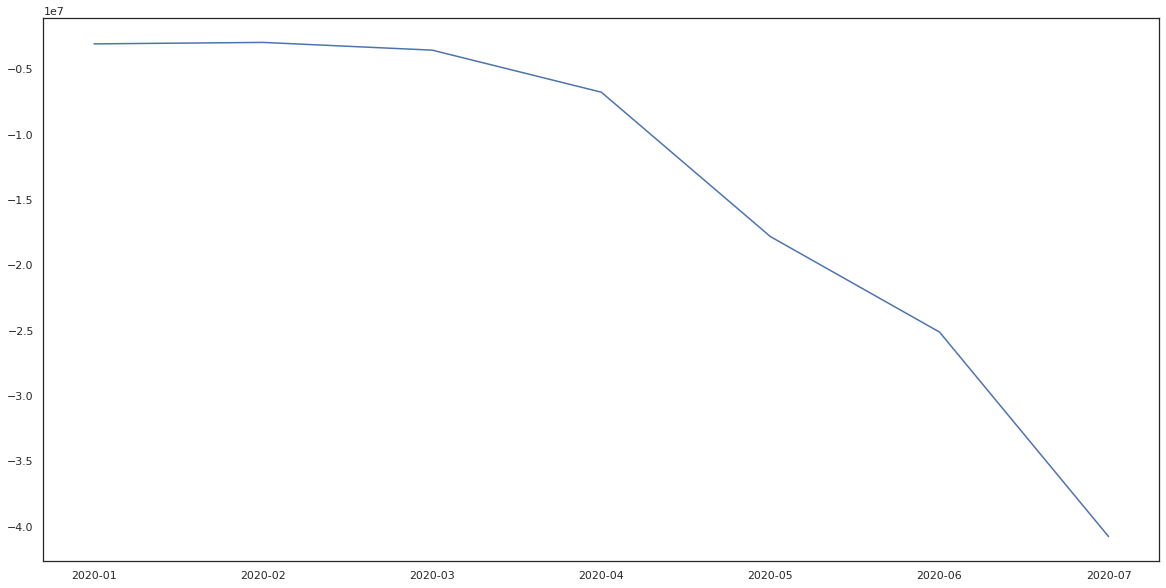

In [269]:
plt.plot(data_train_full.groupby('order_completed_at').agg({'promo_total_sum': 'sum'}))

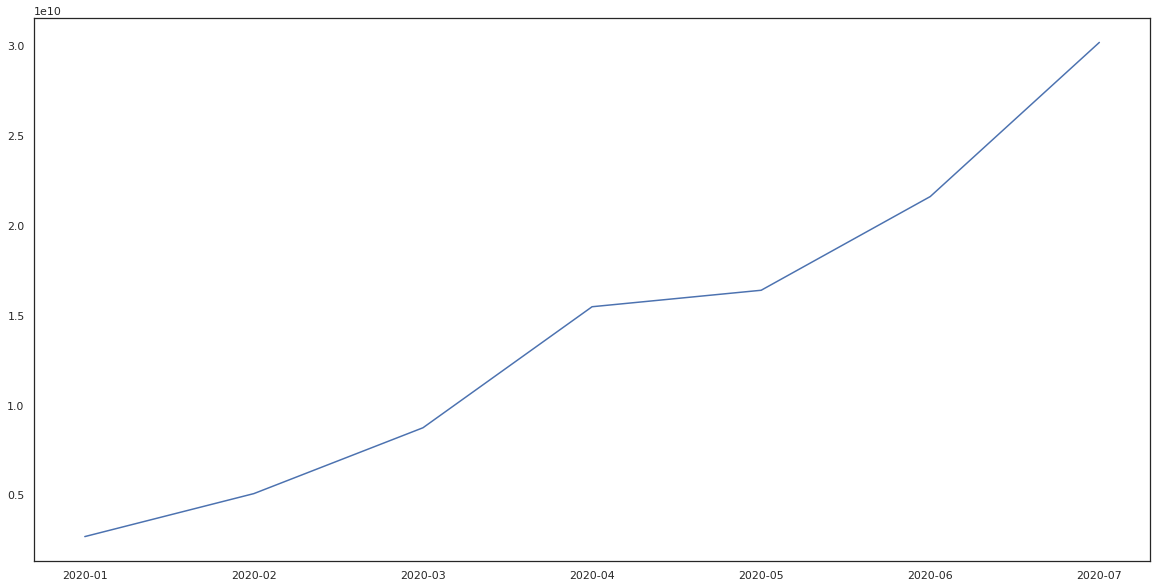

In [270]:
plt.plot(data_train_full[data_train_full.target==1].groupby('order_completed_at').agg({'phone_id': 'sum'}))

In [257]:
data_train_full[(data_train_full.is_promo>0) & (data_train_full.promo_total_min<0)].target.value_counts()

1.0    97
0.0    36
Name: target, dtype: int64

In [259]:
data_train_full[data_train_full.is_promo>0].target.value_counts()

1.0    239
0.0    102
Name: target, dtype: int64

In [261]:
97/239, 36/102

(0.40585774058577406, 0.35294117647058826)

In [ ]:
data_train_full[data_train_full.is_promo>0].target.value_counts(normalize=True)

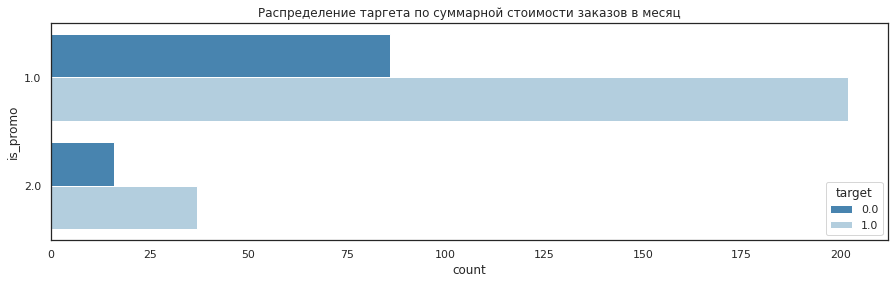

In [253]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y='is_promo', hue='target', data=data_train_full[data_train_full.is_promo>0], palette='Blues_r').set_title('Распределение таргета по суммарной стоимости заказов в месяц');
plt.show()